# Pós-Graduação em Ciência de Dados e Analytics - PUC-Rio
**MVP - BRASILEIRÃO DE PONTOS CORRIDOS**

**Aluno: Franklin da Silva Porto**


**RA: 4052023000124**

**1.   *Introdução***

Até então com 30 anos de existência, o Campeonato Brasileiro não tinha estabilidade nas regras e nem um sistema padrão de disputas, sendo realizado em um formato diferente em quase todos os anos. No geral, era usado o formato “classificatório e eliminatório”, o que tornava a competição relativamente injusta. Porém, em 2003, a história mudou: a CBF decidiu adotar o formato de “pontos corridos”, que é realizado até os dias atuais. Nesse modo de disputa, todos jogam contra todos em turno e returno e o campeão será o time que mais acumular pontos..

**2.   *Descrição do problema***

Várias empresas do ramo esportivo, como mídias sociais, jornalísticas e até mesmo casa de apostas, podem ter a necessidade de obter informações sobre o assunto abordado. Devido a isso, o propósito desse MVP é apresentar algumas Estatísticas sobre todos os Campeonatos Brasileiros no formato “pontos corridos” até o ano de 2020, nas quais apontam números onde tais empresas poderão utilizar informações e conhecimentos específicos a respeito desse modelo do campeonato de futebol mais importante e mais admirado do país. 

**3.   *Pré-processamento***

Sobre o Dataset analisado, foi usado um arquivo .csv contendo dados sobre todos os jogos do campeonato brasileiro de futebol, dos anos de 2003 (quando começou o formato “pontos corridos”) até 2020. Devido à pandemia da Covid-19, alguns jogos de 2020 foram adiados, e então, realizados no início de 2021.

  3.1 *Definição dos atributos/colunas do Dataset*

O arquivo, denominado "Brasileirao.csv", possui os seguintes atributos:

*   RODADA: o número da rodada de cada partida de uma temporada de um campeonato;
*   DATA: a data de cada partida;
*   HORARIO: horário da partida;
*   DIA: dia da semana da partida;
*   MANDANTE: time da casa ou mandante;
*   VISITANTE: time fora da casa ou visitante;
*   VENCEDOR: vencedor da partida;
*   ARENA: estádio onde a partida foi realizada;
*   MANDANTE PLACAR: gols do time mandante;
*   VISITANTE PLACAR: gols do time visitante;
*   ESTADO MANDANTE: Estado da Federação no qual o time mandante pertence;
*   ESTADO VISITANTE: Estado da Federação no qual o time visitante pertence;
*   ESTADO VENCEDOR: Estado da Federação do time vencedor da partida.


  3.2 *Ajustes*

O Dataset original continha erros de dados incorretos que tiveram que ser corrigidos: 
* Nas colunas ESTADO MANDANTE, ESTADO VISITANTE e ESTADO VENCEDOR, constavam o estado do Espírito Santo(ES) como participante, visto que tal estado nunca teve times representantes em tais competições. A correção foi feita substituindo o estado do Espírito Santo pelo estado da Bahia(BA), pois equivocaram-se achando que a equipe do Vitória pertencesse ao estado do ES. 
* Algumas equipes cadastradas nas colunas MANDANTE, VISITANTE e VENCEDOR tiveram nomes repetidos em maiúsculas e minúsculas, o que estava acarretando redundância. Foi feita a correção, padronizando todas em minusculas, com a primeira letra em maiúscula.
* Na coluna ARENA, foi preciso renomear alguns dados pois eram redundantes. Alguns estádios estavam com o nome diferente mas já estavam cadastrados com outros nomes.

A fim de manter a originalidade da base, não foi utilizada a técnica de Feature Selection, embora algumas colunas sejam inutilizadas para a análise.

**4.   *Análise dos Dados***








In [79]:
#Importação das bibliotecas e carregamento dos dados
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

url_dados = "https://raw.githubusercontent.com/FrankPorto/frank_rep/main/brasileirao.csv"

df_bra = pd.read_csv(url_dados, sep = ',')
df_bra.head()

,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor
0,1,29/03/2003,16h00,Sábado,Athlético-PR,Grêmio,Athlético-PR,Arena da Baixada,2,0,PR,RS,PR
1,1,29/03/2003,16h00,Sábado,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ,SP
2,1,30/03/2003,16h00,Domingo,Fortaleza,Bahia,-,Castelão,0,0,CE,BA,-
3,1,30/03/2003,16h00,Domingo,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR,-
4,1,30/03/2003,16h00,Domingo,Vitória,Figueirense,-,Barradão,1,1,BA,SC,-


Abaixo, o tipo do Dataframe, seguido pelos tipos dos dados dos atributos:

In [5]:
type(df_bra)

pandas.core.frame.DataFrame

In [6]:
df_bra.dtypes

Rodada               int64
Data                object
Horário             object
Dia                 object
Mandante            object
Visitante           object
Vencedor            object
Arena               object
Mandante Placar      int64
Visitante Placar     int64
Estado Mandante     object
Estado Visitante    object
Estado Vencedor     object
dtype: object

Informações das rodadas e dos gols dos times mandantes e dos times da casa:

In [7]:
df_bra.describe()

,Rodada,Mandante Placar,Visitante Placar
count,7266.000000,7266.000000,7266.000000
mean,20.235067,1.568676,1.031379
std,11.515910,1.240198,1.032096
min,1.000000,0.000000,0.000000
25%,10.000000,1.000000,0.000000
50%,20.000000,1.000000,1.000000
75%,30.000000,2.000000,2.000000
max,46.000000,7.000000,7.000000


As únicas informações úteis do campo RODADA são: - o máximo de rodadas de um determinado campeonato foi de 46; - todos os campeonatos tiveram ao todo, 7266 jogos. As outras informações são irrelevantes. Quanto aos placares, prevalece a lógica: nota-se, nitidamente, que os times têm um aproveitamento maior jogando em casa.

  4.1 *Times*

  A seguir, a análise sobre todos os times participantes:

In [8]:
#Número de times participantes
times = df_bra['Mandante']
len(sorted(set(times)))

44

In [9]:
#Lista dos times participantes
sorted(set(times))

['América-MG',
 'América-RN',
 'Athlético-PR',
 'Atlético-GO',
 'Atlético-MG',
 'Avaí',
 'Bahia',
 'Barueri',
 'Botafogo-RJ',
 'Bragantino',
 'Brasiliense',
 'CSA',
 'Ceará',
 'Chapecoense',
 'Corinthians',
 'Coritiba',
 'Criciúma',
 'Cruzeiro',
 'Figueirense',
 'Flamengo',
 'Fluminense',
 'Fortaleza',
 'Goiás',
 'Grêmio',
 'Grêmio Prudente',
 'Guarani',
 'Internacional',
 'Ipatinga',
 'Joinville',
 'Juventude',
 'Náutico',
 'Palmeiras',
 'Paraná',
 'Paysandu',
 'Ponte Preta',
 'Portuguesa',
 'Santa Cruz',
 'Santo André',
 'Santos',
 'Sport',
 'São Caetano',
 'São Paulo',
 'Vasco',
 'Vitória']

In [10]:
# Total de pontos
totvitptime = df_bra.groupby(by=['Vencedor']).count().sort_values(by='Rodada', ascending=True)
totvitptime['Rodada'].sum() #total de vitórias
totpontvit = totvitptime['Rodada'].sum() * 3 # total de pontos de vitórias
empates = df_bra[df_bra['Vencedor']=='-']
totpontemp = empates['Rodada'].count()
totgerpont = totpontvit + totpontemp
totgerpont

23702

In [11]:
#total de vitórias e derrotas
totvitptime['Rodada'].sum() - empates['Rodada'].count()

5362

In [12]:
#total de empates
totpontemp

1904

*   Número de times participantes: **44**

São eles: América-MG, América-RN, Athlético-PR, Atlético-GO, Atlético-MG, Avaí, Bahia, Barueri, Botafogo-RJ, Bragantino, Brasiliense, CSA, Ceará, Chapecoense, Corinthians, Coritiba, Criciúma, Cruzeiro, Figueirense, Flamengo, Fluminense, Fortaleza, Goiás, Grêmio, Grêmio Prudente, Guarani, Internacional, Ipatinga, Joinville, Juventude, Náutico, Palmeiras, Paraná, Paysandu, Ponte Preta, Portuguesa, Santa Cruz, Santo André, Santos, Sport, São Caetano, São Paulo, Vasco e Vitória.

*   Número total de jogos: **7266**
*   Número total de pontos: **23702**
*   Número total de vitórias(consequentemente, também de derrotas): **5362**
*   Número total de empates: **1904**


* Total de vitórias por time:

In [13]:
#Total de vitórias dos times por número de pontos
df_bra.groupby('Vencedor').count()
pontstime = df_bra.groupby('Vencedor').count().sort_values(by='Rodada')
pontstimeajust = pontstime['Rodada']
pontstimesememp = pontstimeajust.head(pontstimeajust.shape[0] -1) #foi excluído o dado dos empates
pontstimesememp

Vencedor
América-RN           4
Grêmio Prudente      7
Joinville            7
CSA                  8
Ipatinga             9
Brasiliense         10
Santo André         11
Barueri             12
Bragantino          13
Santa Cruz          15
América-MG          25
Portuguesa          31
Guarani             36
Paysandu            41
Criciúma            50
Atlético-GO         51
Náutico             54
Ceará               54
Avaí                57
Fortaleza           61
São Caetano         65
Chapecoense         69
Juventude           71
Paraná              83
Bahia              104
Ponte Preta        114
Sport              122
Vitória            123
Figueirense        142
Coritiba           169
Goiás              189
Vasco              196
Botafogo-RJ        213
Palmeiras          266
Athlético-PR       266
Atlético-MG        267
Fluminense         270
Corinthians        281
Grêmio             283
Internacional      292
Cruzeiro           293
Flamengo           296
Santos             305
Sã

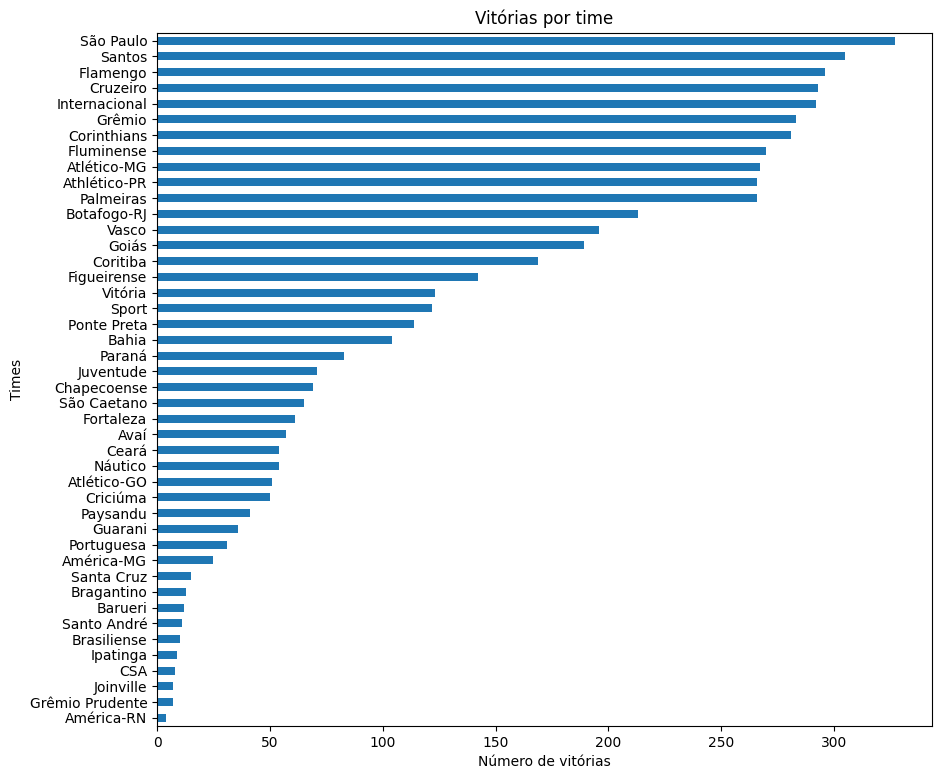

In [14]:
pontstimesememp.plot.barh(title='Vitórias por time', xlabel='Número de vitórias', ylabel='Times', figsize=(10,9))
plt.show()

  4.2 *Gols*
  
  A seguir, alguns números sobre os gols:

In [15]:
#Total de gols dos mandantes
df_bra['Mandante Placar'].sum()

11398

In [16]:
#Total de gols dos visitantes
df_bra['Visitante Placar'].sum()

7494

In [17]:
#Tota geral de gols
df_bra['Mandante Placar'].sum() + df_bra['Visitante Placar'].sum()

18892

*   Total de geral gols: **18892**
*   Total de gols em casa: **11398**
*   Total de gols fora de casa: **7494**
*   Média de gols em casa: **1,57**
*   Média de gols fora de casa: **1,03**



*   Total de gols em casa por time:

In [18]:
#Gols em casa por time
golscasaptime = df_bra.groupby(by=['Mandante']).sum()
gcpt = golscasaptime['Mandante Placar']
gcpt

<ipython-input-18-c101ce4e0633>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  golscasaptime = df_bra.groupby(by=['Mandante']).sum()


Mandante
América-MG          68
América-RN          12
Athlético-PR       557
Atlético-GO        119
Atlético-MG        582
Avaí               147
Bahia              228
Barueri             35
Botafogo-RJ        480
Bragantino          34
Brasiliense         26
CSA                 17
Ceará              116
Chapecoense        136
Corinthians        510
Coritiba           362
Criciúma           121
Cruzeiro           590
Figueirense        311
Flamengo           584
Fluminense         531
Fortaleza          154
Goiás              439
Grêmio             577
Grêmio Prudente     25
Guarani             83
Internacional      536
Ipatinga            28
Joinville           19
Juventude          157
Náutico            131
Palmeiras          534
Paraná             186
Paysandu           132
Ponte Preta        256
Portuguesa          90
Santa Cruz          50
Santo André         29
Santos             653
Sport              278
São Caetano        120
São Paulo          606
Vasco              437
Vi

*   Total de gols fora de casa por time

In [19]:
#Gols fora de casa por time
golscasaptime = df_bra.groupby(by=['Visitante']).sum()
gfpt = golscasaptime['Visitante Placar']
gfpt

<ipython-input-19-cd221cefb1e8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  golscasaptime = df_bra.groupby(by=['Visitante']).sum()


Visitante
América-MG          36
América-RN          12
Athlético-PR       335
Atlético-GO         97
Atlético-MG        385
Avaí                93
Bahia              160
Barueri             24
Botafogo-RJ        296
Bragantino          16
Brasiliense         23
CSA                  7
Ceará               88
Chapecoense         98
Corinthians        358
Coritiba           251
Criciúma            73
Cruzeiro           388
Figueirense        219
Flamengo           400
Fluminense         415
Fortaleza           85
Goiás              274
Grêmio             335
Grêmio Prudente     14
Guarani             57
Internacional      357
Ipatinga             9
Joinville            7
Juventude          111
Náutico             93
Palmeiras          355
Paraná             126
Paysandu            61
Ponte Preta        158
Portuguesa          47
Santa Cruz          36
Santo André         17
Santos             407
Sport              161
São Caetano         89
São Paulo          431
Vasco              310
V

*   Comparação entre Gols em casa e fora

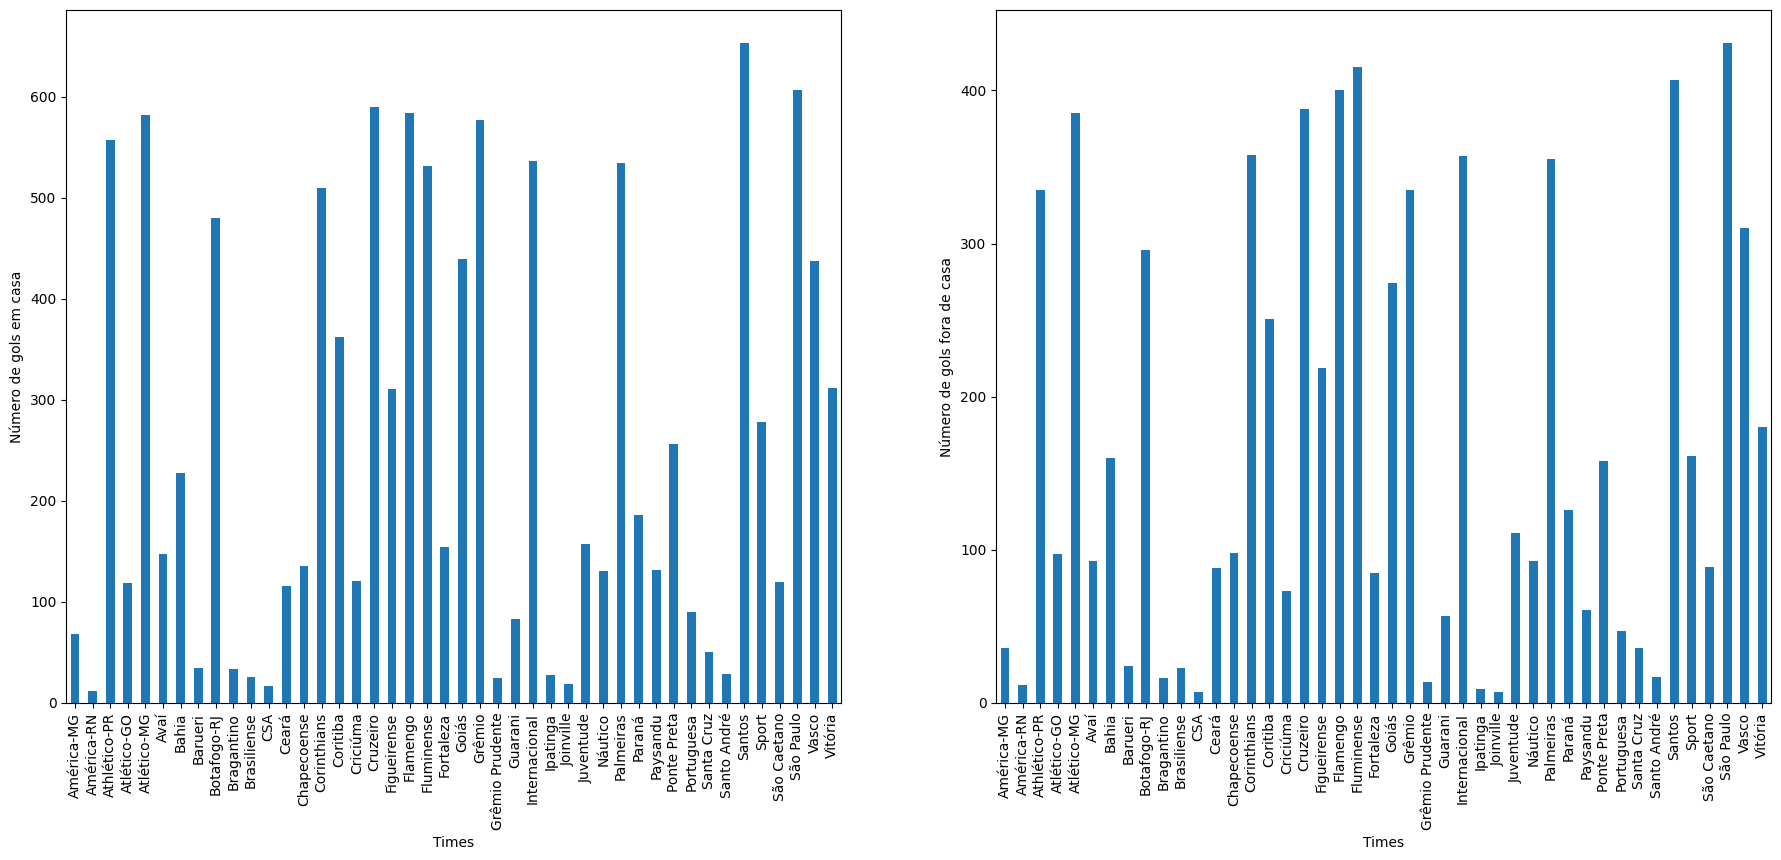

In [20]:
plt.subplot(1,2,1)
#plt.yticks(range(0, 600))
gcpt.plot.bar(xlabel='Times', ylabel='Número de gols em casa', figsize=(22,9))
plt.subplot(1,2,2)
gfpt.plot.bar(xlabel='Times', ylabel='Número de gols fora de casa', figsize=(22,9))
plt.show()

* Total geral de gols por time:

In [21]:
totgergols = gcpt + gfpt
totgergols.sort_values()

Mandante
América-RN           24
CSA                  24
Joinville            26
Ipatinga             37
Grêmio Prudente      39
Santo André          46
Brasiliense          49
Bragantino           50
Barueri              59
Santa Cruz           86
América-MG          104
Portuguesa          137
Guarani             140
Paysandu            193
Criciúma            194
Ceará               204
São Caetano         209
Atlético-GO         216
Náutico             224
Chapecoense         234
Fortaleza           239
Avaí                240
Juventude           268
Paraná              312
Bahia               388
Ponte Preta         414
Sport               439
Vitória             492
Figueirense         530
Coritiba            613
Goiás               713
Vasco               747
Botafogo-RJ         776
Corinthians         868
Palmeiras           889
Athlético-PR        892
Internacional       893
Grêmio              912
Fluminense          946
Atlético-MG         967
Cruzeiro            978
Flameng

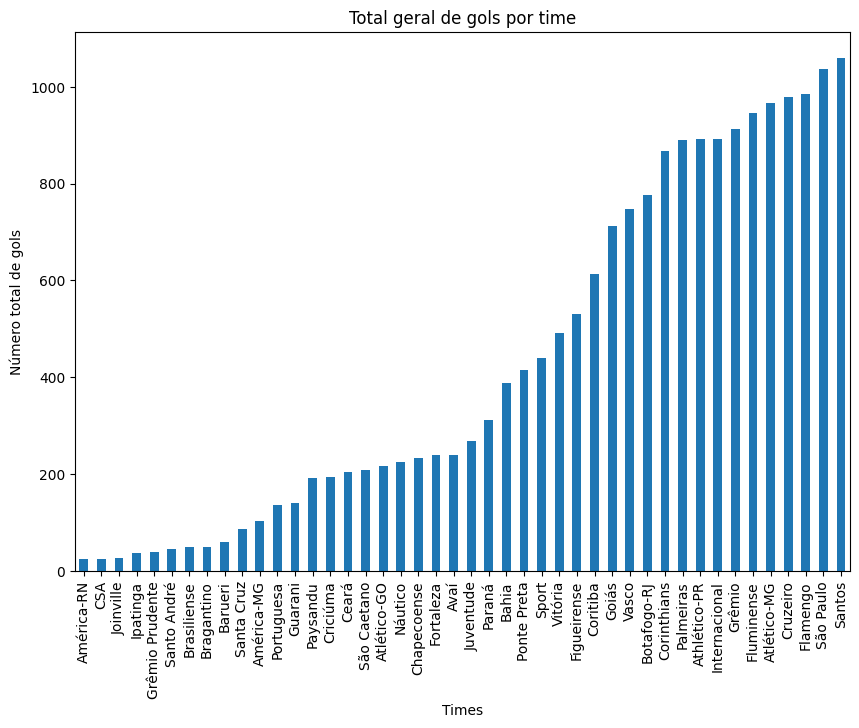

In [22]:
totgergols.sort_values().plot.bar(title='Total geral de gols por time', xlabel='Times', ylabel='Número total de gols', figsize=(10,7))
plt.show()

[Text(0.5, 1.0, 'Posição de cada time em relação à quantidade de gols')]

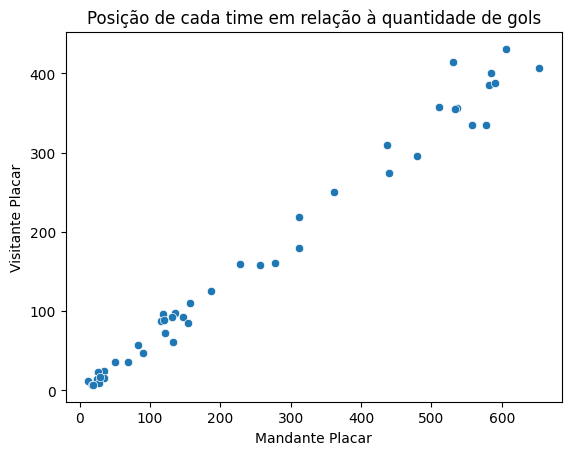

In [23]:
qtdgoldisp = sbn.scatterplot(x=gcpt, y=gfpt, data=totgergols)
qtdgoldisp.set(title='Posição de cada time em relação à quantidade de gols')

No gráfico de dispersão acima, como esperado, nota-se uma tendência dos times a fazer mais gols em casa.

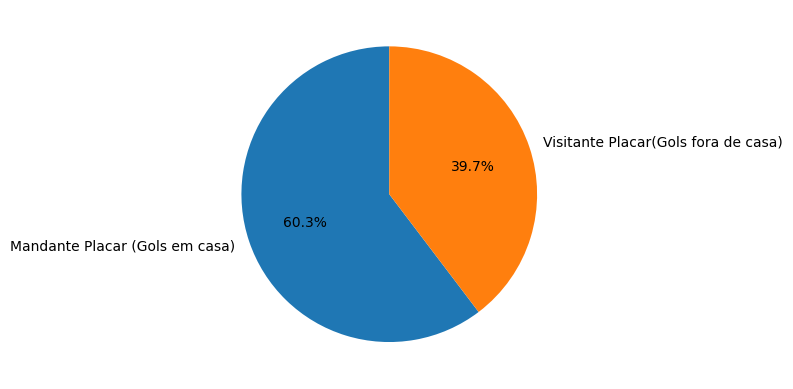

In [24]:
lbl=["Mandante Placar (Gols em casa)","Visitante Placar(Gols fora de casa)"]
qtd_gol = [df_bra['Mandante Placar'].sum(),df_bra['Visitante Placar'].sum()]
plt.pie(qtd_gol, labels= lbl, startangle=90, autopct='%1.1f%%')
plt.show()


Nota-se, no gráfico de pizza acima, a larga vantagem em jogar em casa.

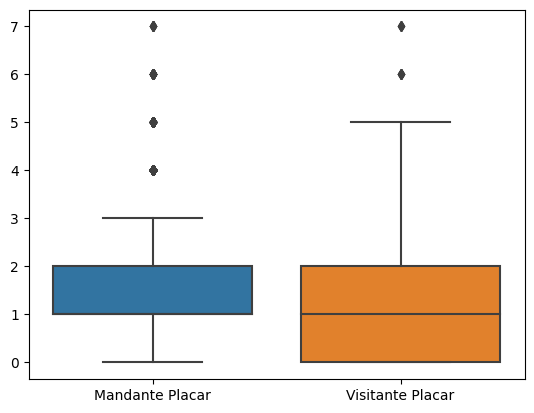

In [68]:
vis_man = df_bra[['Mandante Placar','Visitante Placar']]
sbn.boxplot(vis_man)
plt.show()

Nesse gráfico de caixa, nota-se maior dificuldade dos times em fazer gol fora de casa. A mediana é de 1 gol para ambos, porém a quantidade de gols em casa é superior, vide gráfico de pizza acima.

In [72]:
#Quantidade de ocorrências de gols dos placares em casa
df_bra.groupby('Mandante Placar').size()

Mandante Placar
0    1457
1    2457
2    1857
3     959
4     378
5     116
6      36
7       6
dtype: int64

In [74]:
#Quantidade de ocorrências de gols dos placares fora de casa
df_bra.groupby('Visitante Placar').size()

Visitante Placar
0    2645
1    2597
2    1386
3     467
4     142
5      21
6       5
7       3
dtype: int64

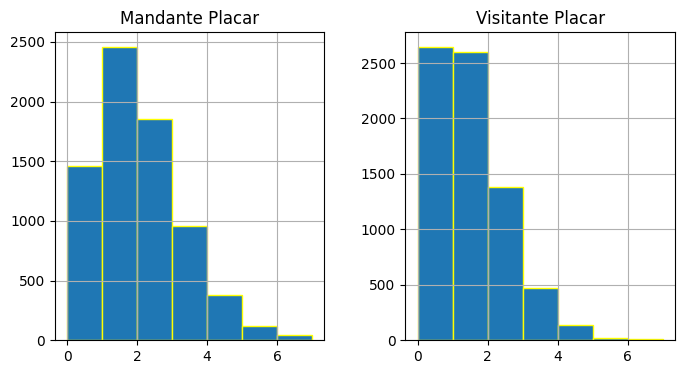

In [75]:
df_bra[['Mandante Placar','Visitante Placar']].hist(figsize=(8,4), bins=7, edgecolor='yellow')
plt.show()

Nos histogramas acima, nota-se a tendência dos time a fazerem menos gols fora de casa e mais gols em casa.

4.3 *Estádios/Arenas*

O que seria do espetáculo sem o palco? Seguem as informações sobre os estádios ou arenas:

In [26]:
#Número de estádios
estadios = df_bra['Arena']
len(sorted(set(estadios)))


105

In [27]:
sorted(set(estadios))


['1º de Maio',
 'Aflitos',
 'Alfredo Jaconi',
 'Allianz Parque',
 'Anacleto Campanella',
 'Antônio Accioly',
 'Antônio Guimarães',
 'Arena Barueri',
 'Arena Condá',
 'Arena Corinthians',
 'Arena Joinville',
 'Arena Pantanal',
 'Arena Pernambuco',
 'Arena da Amazônia',
 'Arena da Baixada',
 'Arena das Dunas',
 'Arena do Grêmio',
 'Arena do Jacaré',
 'Arruda',
 'Barradão',
 'Batistão',
 'Beira Rio',
 'Benedito Teixeira',
 'Bento Freitas',
 'Bezerrão',
 'Boca do Jacaré',
 'Brinco de Ouro',
 'Bruno José Daniel',
 'Caio Martins',
 'Canindé',
 'Castelão',
 'Centenário',
 'Cláudio Moacyr',
 'Colosso da Lagoa',
 'Couto Pereira',
 'Curuzu',
 'Durival de Brito',
 'Edson Passos',
 'Eduardo José Farah',
 'Engenheiro Araripe',
 'Estádio do Café',
 'Estádio do Vale',
 'Fonte Luminosa',
 'Fonte Nova',
 'Giulite Coutinho',
 'Heriberto Hulse',
 'Ilha do Retiro',
 'Independência',
 'Ipatingão',
 'Itaipava Arena Fonte Nova',
 'Juiz de Fora',
 'Juscelino Kubitscheck',
 'Jóia da Princesa',
 'Kléber Andrade

*   Número de estádios: **105**

São eles: **1º de Maio, Aflitos,
 Alfredo Jaconi, Allianz Parque, Anacleto Campanella, Antônio Accioly, Antônio Guimarães, Arena Barueri, Arena Condá, Arena Corinthians, Arena Joinville, Arena Pantanal, Arena Pernambuco, Arena da Amazônia, Arena da Baixada, Arena das Dunas, Arena do Grêmio, Arena do Jacaré, Arruda, Barradão, Batistão, Beira Rio, Benedito Teixeira, Bento Freitas, Bezerrão, Boca do Jacaré, Brinco de Ouro, Bruno José Daniel, Caio Martins, Canindé, Castelão, Centenário, Cláudio Moacyr, Colosso da Lagoa, Couto Pereira, Curuzu, Durival de Brito, Edson Passos, Eduardo José Farah, Engenheiro Araripe, Estádio do Café, Estádio do Vale, Fonte Luminosa, Fonte Nova, Giulite Coutinho, Heriberto Hulse, Ilha do Retiro, Independência, Ipatingão, Itaipava Arena Fonte Nova, Juiz de Fora, Juscelino Kubitscheck, Jóia da Princesa, Kléber Andrade, Kyocera Arena, Luiz Lacerda, Luso Brasileiro, Machadão, Mangueirão, Mané Garrincha, Maracanã, Melão, Mineirão, Mj José Levi Sobrinho, Moacyrzão, Moisés Lucarelli, Morenão, Morumbi, Municipal Juiz de Fora, Mário Helênio, Nabi Abi Chedid, Neo Química Arena, Nilton Santos (Engenhão), Novelli Júnior, Olímpico Monumenta, Olímpico Regional, Orlando Scarpelli, Pacaembu, Palestra Itália, Papa J.Paulo II, Parque Antártica, Parque do Sabiá, Pedro Pedrossian, Pinheirão, Pituaçu, Plácido Castelo, Presidente Vargas, Prudentão, Raulino de Oliveira, Rei Pelé, Ressacada, Romildo Ferreira, Romildão, Santa Cruz, Serejão, Serra Dourada, Serrinha, São Januário, Teixeirão, Vila Belmiro, Vila Capanema, Vila Olímpica, Vivaldo Lima, Willie Davids e Wilson de Barros.**
*   Jogos por estádio:


In [28]:
jogest = df_bra.groupby(by=['Arena']).count().sort_values(by='Rodada', ascending=True)
jogest['Rodada']

Arena
1º de Maio                  1
Municipal Juiz de Fora      1
Papa J.Paulo II             1
Pedro Pedrossian            1
Romildo Ferreira            1
                         ... 
Vila Belmiro              300
Beira Rio                 312
Morumbi                   357
Mineirão                  400
Maracanã                  529
Name: Rodada, Length: 105, dtype: int64

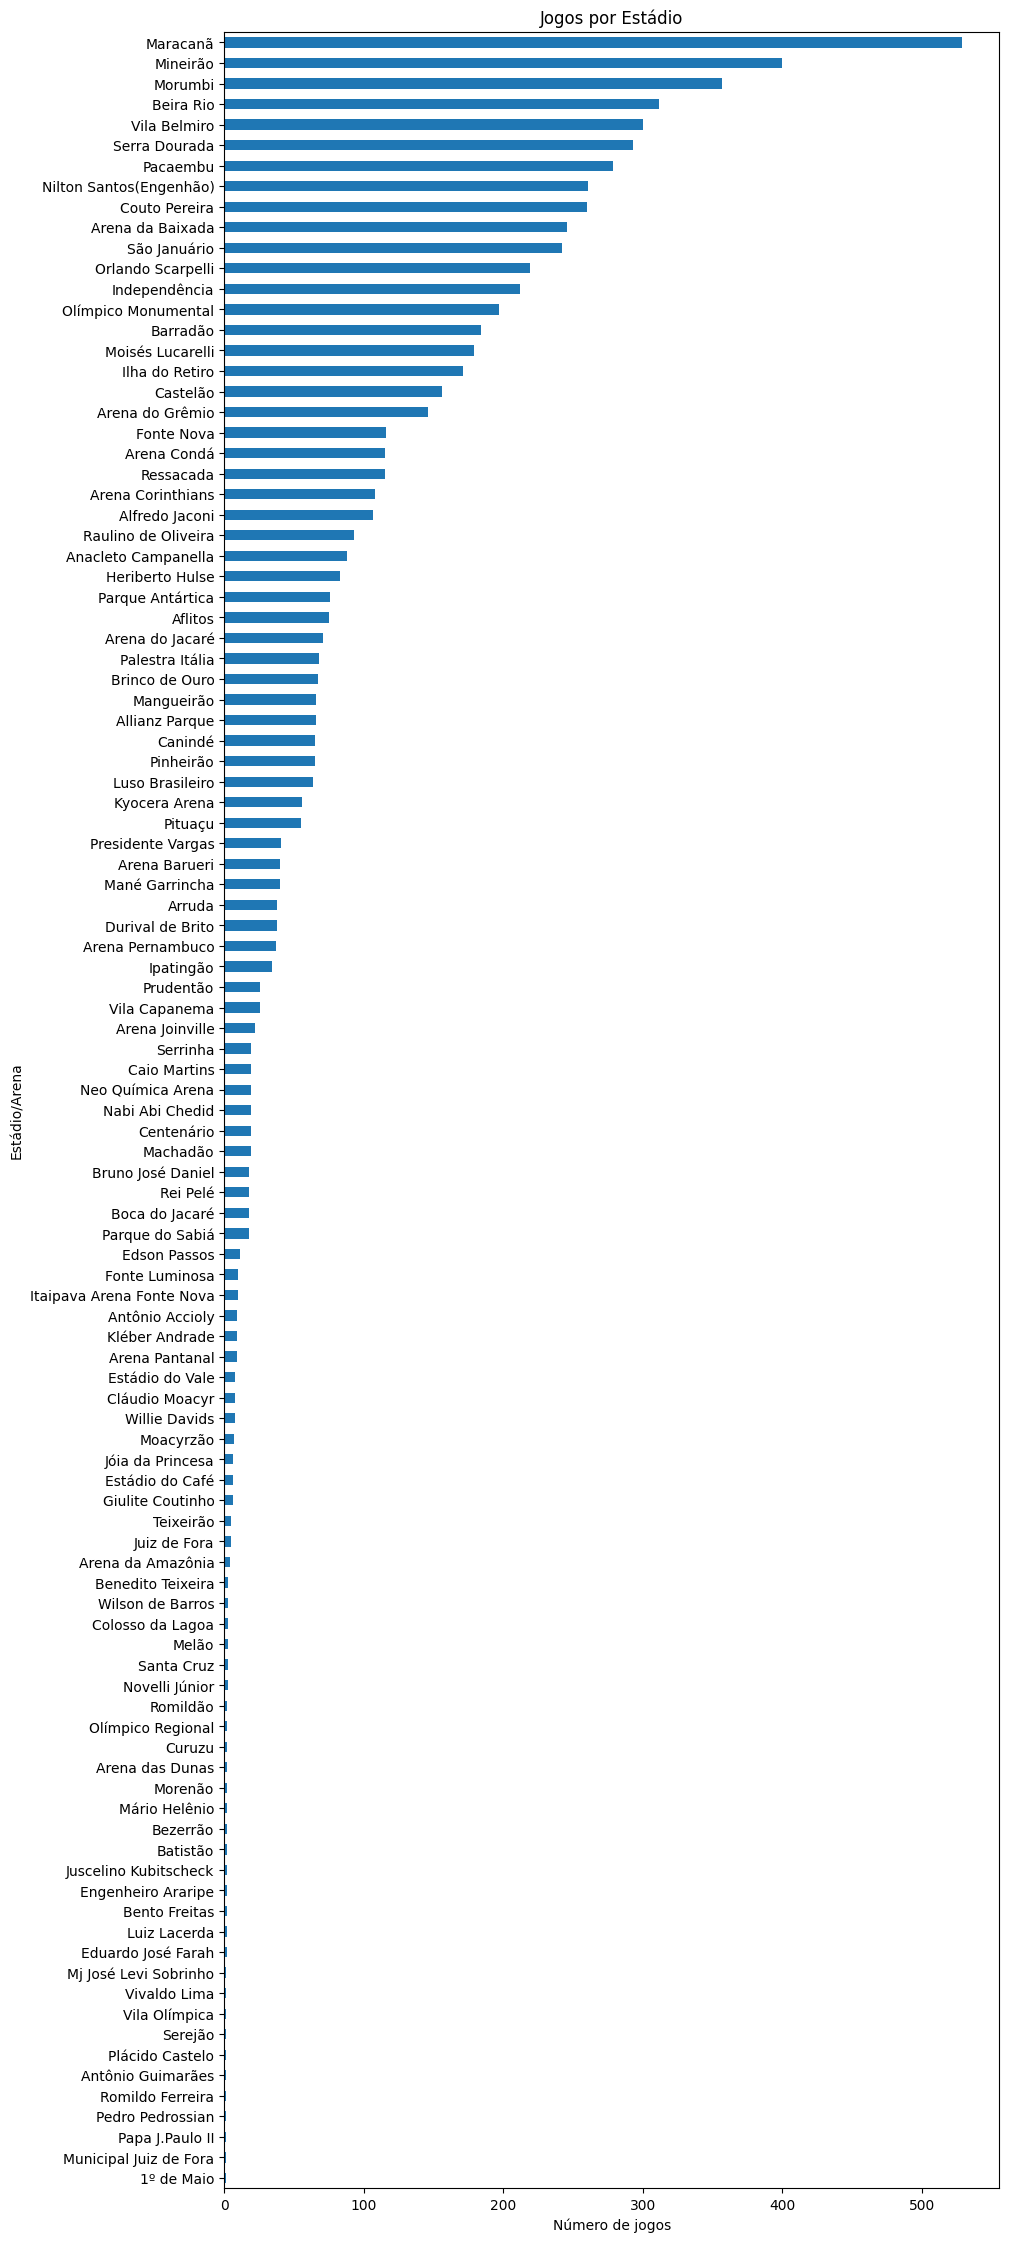

In [29]:
from numpy.ma import size
jogest['Rodada'].plot.barh(title='Jogos por Estádio', xlabel='Número de jogos', ylabel='Estádio/Arena', figsize=(10,28))
plt.show()

4.3 *Estados dos times participantes*

Segue informações sobre os Estados da Federação aos quais os times pertencem:

In [37]:
#Quantidade de Estados
esttim = df_bra.groupby(by=['Estado Mandante']).count().sort_values(by='Rodada', ascending=False)
esttim['Rodada'].count()

14

In [45]:
#Estados
sorted(set(df_bra['Estado Mandante']))

['AL',
 'BA',
 'CE',
 'DF',
 'GO',
 'MG',
 'PA',
 'PE',
 'PR',
 'RJ',
 'RN',
 'RS',
 'SC',
 'SP']

* QUantidade de Estados participantes: **14**

São eles: **AL, BA, CE, DF, GO, MG, PA, PE, PR, RJ, RN, RS, SC e SP.**

* Jogos por Estado:

In [48]:
 jogestfed = df_bra.groupby(by=['Estado Mandante']).count().sort_values(by='Rodada', ascending=False)
jogestfed['Rodada']

Estado Mandante
SP    1812
RJ    1309
RS     769
MG     742
PR     714
SC     550
BA     373
GO     352
PE     323
CE     196
PA      67
DF      21
AL      19
RN      19
Name: Rodada, dtype: int64

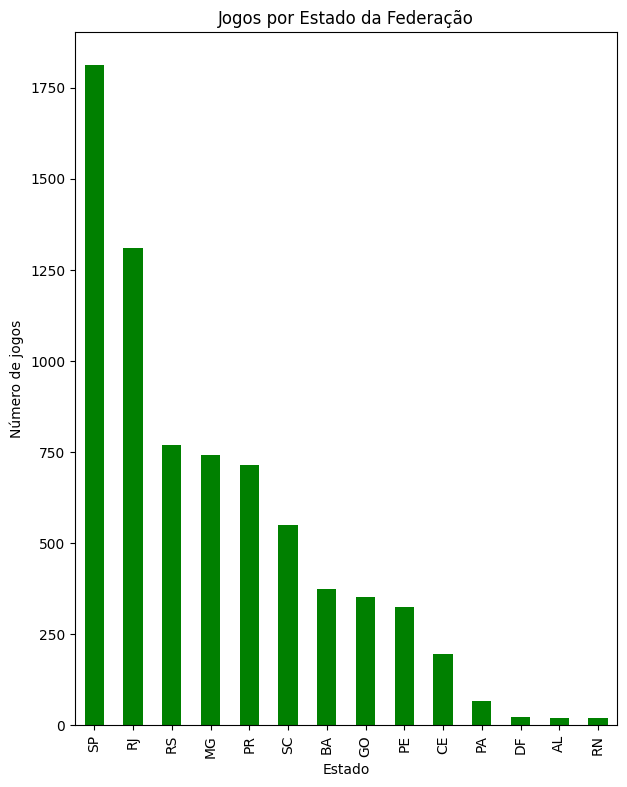

In [54]:
jogestfed ['Rodada'].plot.bar(title='Jogos por Estado da Federação', xlabel='Estado', ylabel='Número de jogos', figsize=(7,9), color='green')
plt.show()

* Vitórias por Estado 

In [65]:
vitpest = df_bra.groupby(by=['Estado Vencedor']).count().sort_values(by='Rodada', ascending=False)
vitestado = vitpest['Rodada']
vitestado2 = vitestado.tail(vitestado.shape[0] -1) #tira os empates
vitestado2


Estado Vencedor
SP    1468
RJ     975
RS     646
MG     594
PR     518
SC     325
GO     240
BA     227
PE     191
CE     115
PA      41
DF      10
AL       8
RN       4
Name: Rodada, dtype: int64

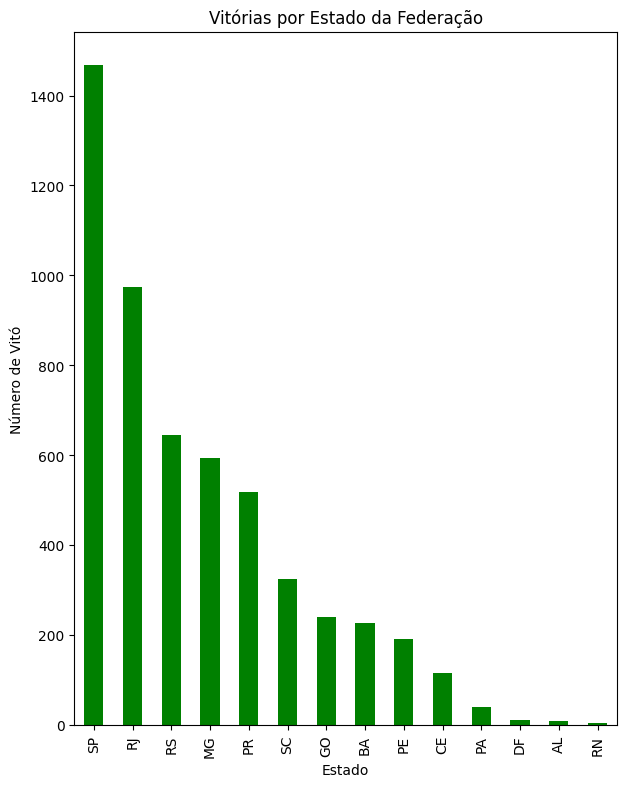

In [67]:
vitestado2.plot.bar(title='Vitórias por Estado da Federação', xlabel='Estado', ylabel='Número de Vitó', figsize=(7,9), color='green')
plt.show()

Os últimos gráficos acima, demostram que a disparidade social também existe nos clubes de futebol. Nos estados mais ricos ainda predominam os títulos e as vitórias. Será que um dia, teremos um clube da região Norte do país jogando a séria A do Brasileirão? Torço que um dia, SIM. 

**5. Conclusão**

O Campeonato Brasileiro de pontos corridos é uma grande paixão dos brasileiros. Os números analisados demonstram a sua grandeza. Muitos gols, clubes, estádios, dentre outras coisas, fizeram e ainda fazem a história desse campeonato. As mídias esportivas poderão utilizar as informações obtidas nesse trabalho para manter o espectador, amante do futebol, informado sobre a história e os números desse campeonato tão amado pelos brasileiros. Finalizo, torcendo para que, num futuro em médio prazo, os times de vários outros estados, também possam ter condições de participar dele.


**REFERÊNCIAS**

* https://brasilescola.uol.com.br/educacao-fisica/campeonato-brasileiro.htm

* 'https://github.com/juvenalfonseca/python/blob/master/datasets/campeonato-brasileiro-pontos-corridos-2003-2020-jogos.csv'